Imagine a company that needs to visit different cities in an area made up of identical rectangular blocks with ‘n’ number of vehicles at their disposal. A diagram of the cities is shown below, with the starting city marked in black and the cities to visit in blue. The vehicles must start and end at the starting city (City 0).

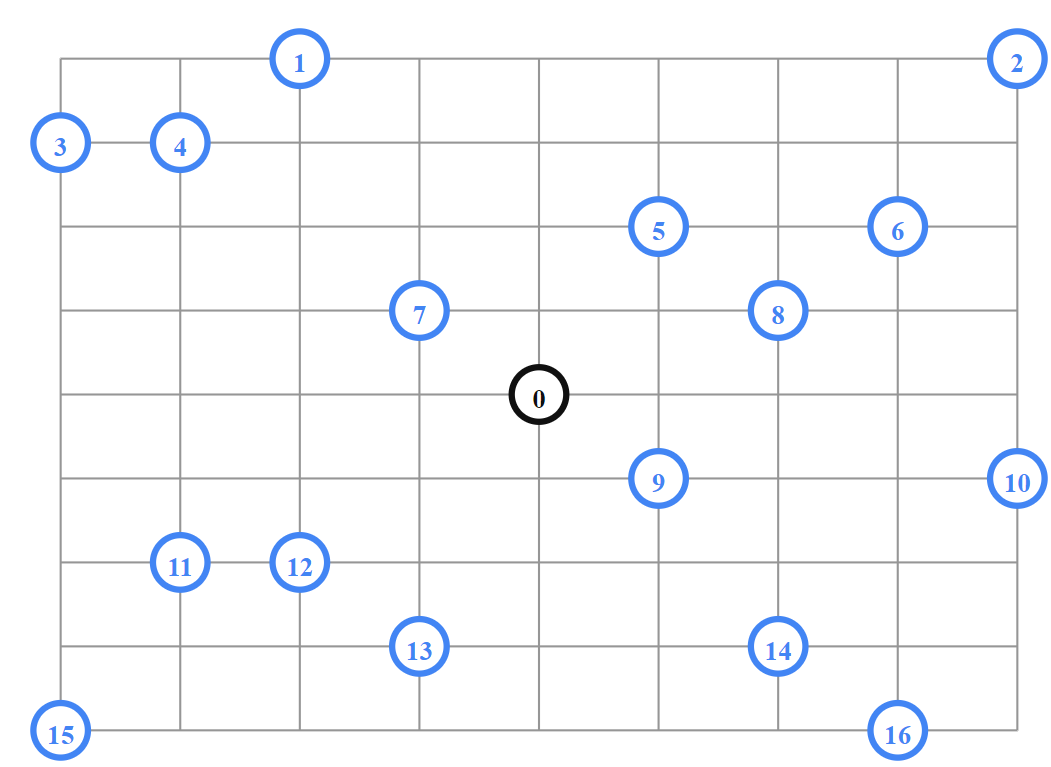

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt

Here are the locations for every city on the rectangular map.

In [26]:

city_coordinates = np.array([
 (456, 320),  # City 0
 (228, 0),    # City 1
 (912, 0),    # City 2
 (0, 80),     # City 3
 (114, 80),   # City 4
 (570, 160),  # City 5
 (798, 160),  # City 6
 (342, 240),  # City 7
 (684, 240),  # City 8
 (570, 400),  # City 9
 (912, 400),  # City 10
 (114, 480),  # City 11
 (228, 480),  # City 12
 (342, 560),  # City 13
 (684, 560),  # City 14
 (0, 640),    # City 15
 (798, 640)  # City 16
])

A distance matrix is also given below where the indices of the arrays correspond to the cities labelled in the diagram up above. The distances are calculated according to the Manhattan distance formula using the coordinates from the above picture:

In [27]:
def create_data():
    data = {}
    data["distance_matrix"] = np.array([
        [0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354, 468, 776, 662],
        [548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674, 1016, 868, 1210],
        [776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164, 1130, 788, 1552, 754],
        [696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822, 1164, 560, 1358],
        [582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708, 1050, 674, 1244],
        [274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628, 514, 1050, 708],
        [502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856, 514, 1278, 480],
        [194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320, 662, 742, 856],
        [308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662, 320, 1084, 514],
        [194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388, 274, 810, 468],
        [536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764, 730, 388, 1152, 354],
        [502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114, 308, 650, 274, 844],
        [388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194, 536, 388, 730],
        [354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0, 342, 422, 536],
        [468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536, 342, 0, 764, 194],
        [776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274, 388, 422, 764, 0, 798],
        [662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730, 536, 194, 798, 0]
    ])

    return data


In [28]:
# calculates total distance of the specific route
def calculate_total_distance(route, distance_matrix):

    total_distance = 0

    # explore the distance matrix for computing the total distance 
    for i in range(len(route) - 1):
        total_distance += distance_matrix[route[i]][route[i + 1]]

    total_distance += distance_matrix[route[-1]][route[0]]  # Return to the starting city

    return total_distance

# Vehicle routing function
def nearest_neighbor_algorithm(distance_matrix, num_cars):

    num_cities = len(distance_matrix)
    starting_city = 0
    cities_to_visit = set(range(1, num_cities)) # Cities not visited yet
    routes = [[] for _ in range(num_cars)]      # initialize routes list

    # create routes untill all cities have been visited
    while cities_to_visit:

        # find a route for each car
        for car in range(num_cars):

            if cities_to_visit:

                current_city = starting_city if not routes[car] else routes[car][-1]
                nearest_city = min(cities_to_visit, key=lambda city: distance_matrix[current_city][city])
                routes[car].append(nearest_city)
                cities_to_visit.remove(nearest_city)
                
            else:
                break  # No need to continue if all cities have been visited
    
    # Ensure each route starts and ends with city 0
    for car in range(num_cars):
        routes[car] = [starting_city] + routes[car] + [starting_city]

    return routes

    



In [32]:
data = create_data()
distance_matrix = data["distance_matrix"]
num_cars = 4
combined_total_distance = 0

#Calling optimizer function
optimal_routes = nearest_neighbor_algorithm(distance_matrix, num_cars)

#Printing solution
for i, route in enumerate(optimal_routes):
    total_distance = calculate_total_distance(route, distance_matrix)   #Distance of individual routes
    
    #Print cities in route
    print(f"Car {i+1} Route: ",end="")
    
    for i, city in enumerate(route):

        if i < len(route) - 1:
            print(f"{city} --> ", end="")
        else:
            print(city,end="")

    # Print distance of individual routes    
    print(f"  Distance: {total_distance}m")
    combined_total_distance += total_distance

# Total distance (combined distance of all cars journey)
print(f"\nTotal Distance: {combined_total_distance}m")


Car 1 Route: 0 --> 7 --> 13 --> 12 --> 15 --> 0  Distance: 1872m
Car 2 Route: 0 --> 9 --> 14 --> 16 --> 1 --> 0  Distance: 2420m
Car 3 Route: 0 --> 5 --> 6 --> 2 --> 4 --> 0  Distance: 2236m
Car 4 Route: 0 --> 8 --> 10 --> 11 --> 3 --> 0  Distance: 2784m

Total Distance: 9312m


### A plot showcasing the route taken by each vehicle can be found below


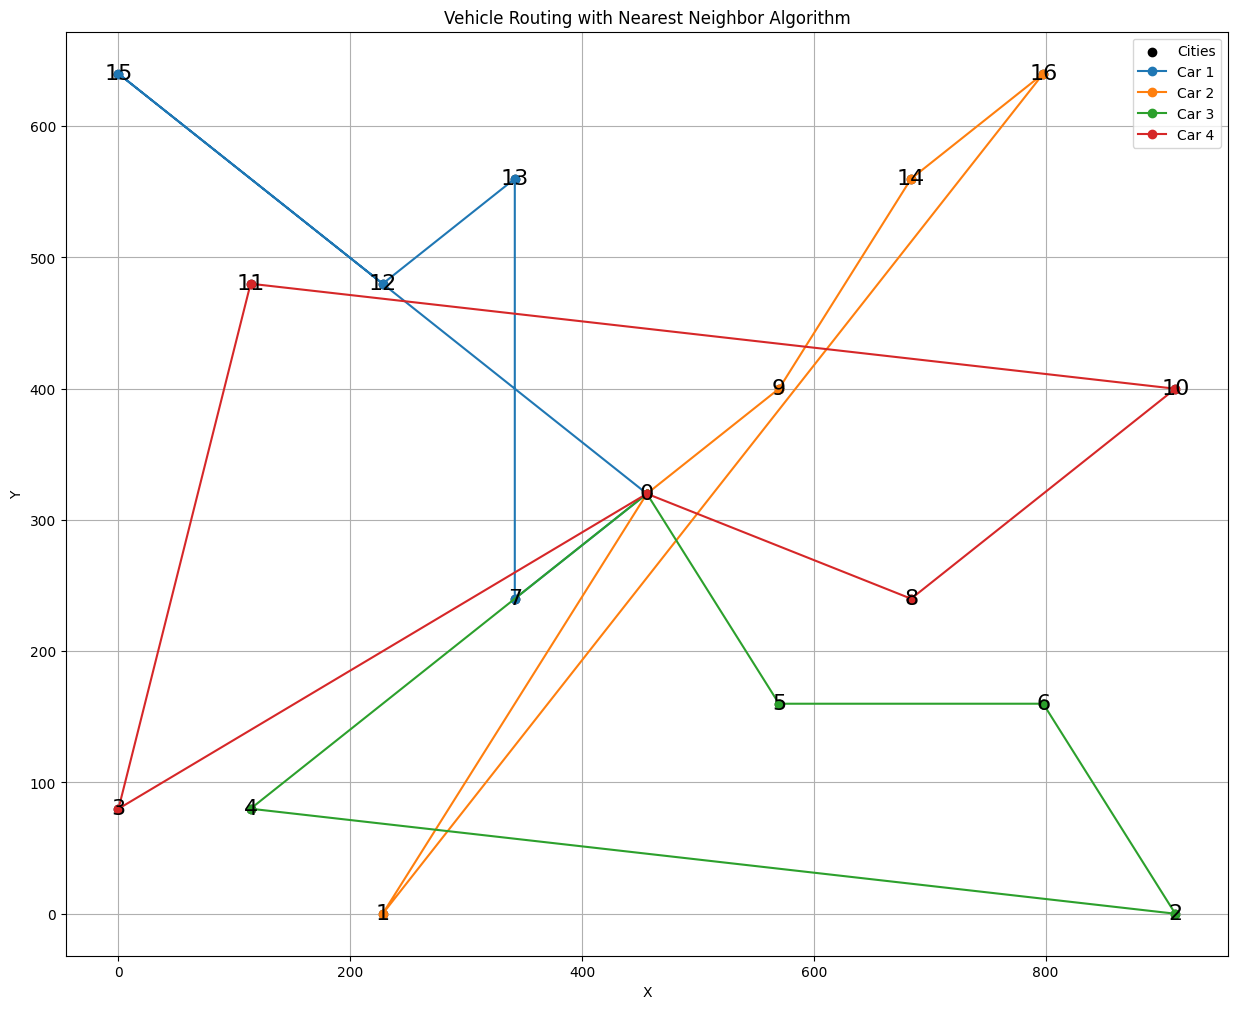

In [33]:
def plot(data, routes):
    plt.figure(figsize=(15, 12))

    plt.scatter(city_coordinates[:, 0], city_coordinates[:, 1], c='black', marker='o', label='Cities')

    # Plot routes
    for vehicle, route in enumerate(routes):
        route_positions = city_coordinates[route]
        plt.plot(route_positions[:, 0], route_positions[:, 1], linestyle='-', marker='o', label=f'Car {vehicle + 1}')

    for i, (x, y) in enumerate(city_coordinates):
        plt.text(x, y, f'{i}', fontsize=16, ha='center', va='center')

    plt.title('Vehicle Routing with Nearest Neighbor Algorithm')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot the solution
plot(data, optimal_routes)